In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import tensorflow as tf

In [51]:
x_data = np.linspace(0.0, 10.0,1000000)

In [52]:
noise = np.random.randn(len(x_data))

In [53]:
noise

array([-1.41699317,  0.16044116, -1.33051046, ..., -0.09230151,
       -0.37823461, -1.9603876 ])

y = mx + b

b = 5

In [54]:
y_true = (0.5 * x_data) + 5 + noise

In [55]:
x_df = pd.DataFrame(data=x_data, columns=['x Data'])

In [56]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [57]:
y_df.head()

,Y
0,3.583007
1,5.160446
2,3.669500
3,5.528490
4,5.187730


In [58]:
my_data = pd.concat([x_df, y_df],axis=1)

In [59]:
my_data.head()

,x Data,Y
0,0.00000,3.583007
1,0.00001,5.160446
2,0.00002,3.669500
3,0.00003,5.528490
4,0.00004,5.187730


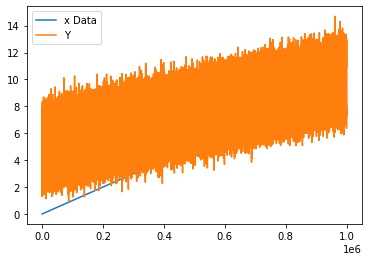

In [60]:
my_data.plot()

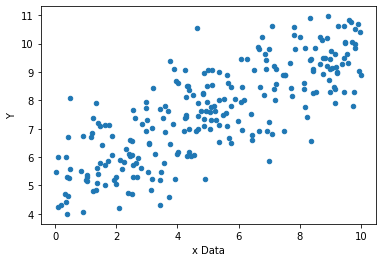

In [65]:
my_data.sample(n=250).plot(kind='scatter', x='x Data', y='Y')

In [66]:
batch_size = 8

In [70]:
np.random.randn(2)

array([0.18876342, 0.71292326])

In [68]:
m = tf.Variable(0.18)
b = tf.Variable(0.71)

In [71]:
xph = tf.placeholder(tf.float32,[batch_size])

In [72]:
yph = tf.placeholder(tf.float32,[batch_size])

In [73]:
y_model = m*xph + b

In [74]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [75]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [76]:
init = tf.global_variables_initializer()

In [77]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [78]:
model_m

0.57194394

In [79]:
model_b

4.8873196

In [82]:
y_hat = x_data*model_m + model_b

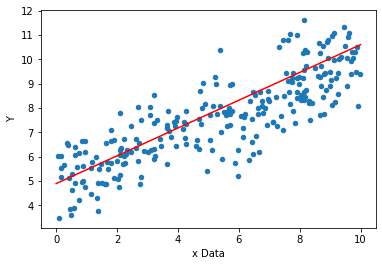

In [83]:
my_data.sample(250).plot(kind='scatter',x='x Data',y='Y')
plt.plot(x_data,y_hat,'r')